# Chapter 3 Lab 2

## Goal

In this lab, we will conduct some exmaple inferential statistics with the VPAL data. We will be working with two datasets. One is data on experienced players. The second is the same type of data collected on inexperienced players. Both groups will be compared using data on the number of quests completed and kills made.

But, collecting and comparing this data is meaningless without a hypothesis. In this case, the Null hypothesis - the hypothesis that is being tested - is that there is NO difference between the two groups. The Alternative hypothesis is what could be the case given the analysis. More specifically, we cannot say that the groups are different. We can only say that we "reject the Null hypothesis" that the groups are the same.

In this case, the hypothesis that experienced players have completed more quests and more kills. Once done, you can also attempt to predict experience from the data and which variables are more predictive of the variable.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Read in the inexperienced player data

In [97]:
Inexperienced = pd.read_csv("ExpNeg_GameData.csv")
Inexperienced.head()

,User ID,Gender,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense
0,105,1,7,5,68,1,0,1,0,1,27,20,3,3,0,0,0
1,109,1,9,3,79,3,1,0,201,3,30,31,57,54,3,0,0
2,111,1,7,3,46,13,4,5,45,9,13,20,71,0,14,30,27
3,115,1,14,3,63,60,60,0,0,0,16,0,0,0,0,0,0
4,123,1,16,5,82,33,33,0,6,1,29,13,5,5,0,0,0


Next, read in the experienced player data.

In [98]:
Experienced = pd.read_csv("ExpPos_GameData.csv")
Experienced.head()

,User ID,Gender,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense
0,173,1,7,5,65,12,6,5,23,10,38,19,30,11,0,18,1
1,113,1,8,5,56,52,46,2,71,9,32,39,42,41,0,0,1
2,137,1,11,7,87,22,16,0,99,6,29,24,25,25,0,0,0
3,153,1,13,6,74,13,6,7,72,11,40,36,44,4,1,16,23
4,165,1,11,5,58,24,16,8,10,8,23,40,20,3,2,8,7


In order to test our hypothesis, we will use a t-test. A t-test is used to determine if there is a significant difference between two groups of data. The mean is pivotal - which means that the variance of the data sets is also important.

To pick the correct t-test we need to check for normality of distribution and compare the variances of the two data sets.

First, let's look at the distribution of Quests for both.

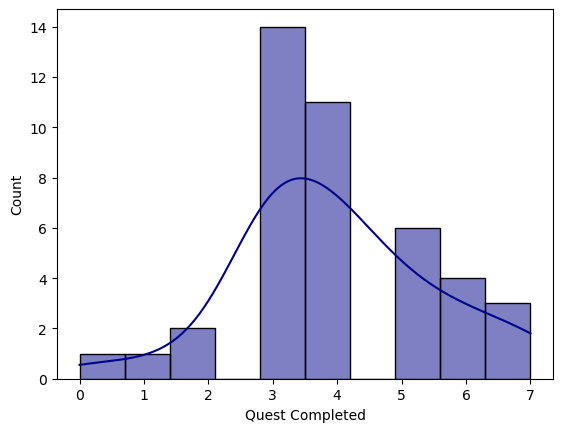

In [99]:
sns.histplot(Inexperienced["Quest Completed"], kde=True, bins=10, color='darkblue');

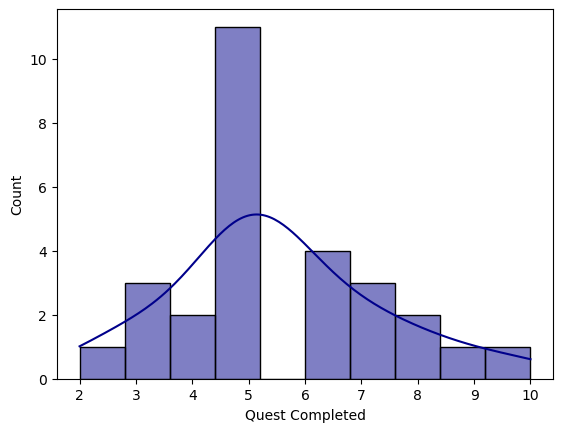

In [100]:
sns.histplot(Experienced["Quest Completed"], kde=True, bins=10, color='darkblue');

Both visualizations indicate a reasonably normal distribution. However, another requirement is that the variances are equal. Let's check that now.

In [101]:
print(np.var(Experienced["Quest Completed"]), np.var(Inexperienced["Quest Completed"]))

3.25 2.283446712018141


The variances are different! 

So a quick word about different variances: The are three common types of t-tests. Independent, Welch, and Paired. For this lab, we are most concerned with the first two. Paired t-tests are used when you have two samples from the same population. For example, if you choose 25 people and have them take one version of an exam and then have the same 25 people take a second version, to compare the means of the resulting scores, you would use a paired t-test.

This is currently not the case. The difference between instances when you'd use an independent or Welch t-test is when the variances of the two samples are equal or unequal respectively. However, in practice, these t-tests are robust to differences in variances - especially if your sample sizes are roughly equal in size and the one variance is not more than twice the other variance. In other words, both independent and Welch t-tests should reach the same conclusion though calculate different p-values.

If variance is more than twice the other, then default to the Welch t-test. That is not the case here.

However, if sample sizes are unequal - and variances are unequal regardless of the difference - you should also default to Welch's t-test. If you'd explored the data sufficiently, you'd know that these two sample sizes are different. Since this is the case, we will use Welch's t-test.

The Python code for both is the same - except to use Welch's t-test, simply set the "equal_var" parameter to False.

In [102]:
print(stats.ttest_ind(Experienced["Quest Completed"], Inexperienced["Quest Completed"], equal_var=False))

Ttest_indResult(statistic=3.6883196002764467, pvalue=0.0005514791146716614)


The most important detail in the output is the p-value. The p-value here refers to the statistic measure in the result. If the p-value is less than .05 then we reject the Null hypothesis that the means of the Quests Completed are NOT significantly different.

This p-value implies that they are significantly different.

Now, we'll look at Kills.

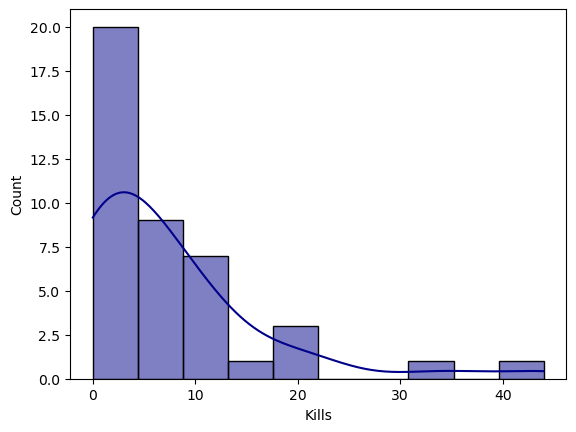

In [103]:
sns.histplot(Inexperienced["Kills"], kde=True, bins=10, color='darkblue');

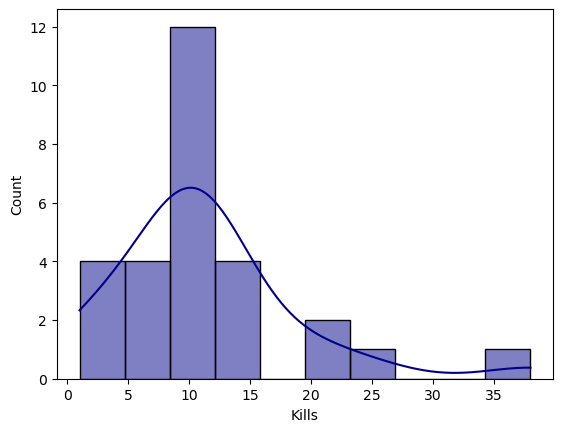

In [104]:
sns.histplot(Experienced["Kills"], kde=True, bins=10, color='darkblue');

It is immediately apparent that these distributions are not normally distributed. Due to it's robustness, we will continue by using Welch's t-test here are as well. 

Note that you could perform Square Root Transformation as we did in the previous lab for this chapter and then perform the test as well.

Let's also check the variances.

In [105]:
print(np.var(Experienced["Kills"]), np.var(Inexperienced["Kills"]))

56.061224489795926 83.85997732426301


In [106]:
print(stats.ttest_ind(Experienced["Kills"], Inexperienced["Kills"], equal_var = False))

Ttest_indResult(statistic=1.9819781347454943, pvalue=0.051718669590685135)


In this case, the p-value is slightly greater than .05. However, bear in mind that since the distributions are not normally distributed you can be suspicious of the results.

## ANOVA - Analysis of Variance

In [107]:
vpal_df2 = pd.read_csv("GamingExpertese&Gender.csv")
vpal_df2 = pd.DataFrame(vpal_df2)
vpal_df2.head()

,Expertise,Gender
0,3,2
1,3,1
2,2,2
3,2,1
4,3,2


In [108]:
vpal_df2.describe()

,Expertise,Gender
count,64.000000,64.000000
mean,2.609375,1.515625
std,0.884024,0.503706
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,3.000000,2.000000
max,4.000000,2.000000


From this quick peek at the data, we see that Expertise has four levels and Gender has two. Let's use a test called Levene's test to check for the equality of variances.

However, unlike R, the Pythonic path to completing this test for categorical variables is a little bumpier due to the fact that Python implements categories which are not exactly like R factors.

Python categories will infer a category for each unique type of value in the column - in this case Gender and in this case a 1 or a 2. Python will convert the values to categories but also keep them as their original data type though they appear as 'object' when you run 'info()'.

In [109]:
vpal_df2["Gender"] = vpal_df2["Gender"].astype("category")
vpal_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Expertise  64 non-null     int64   
 1   Gender     64 non-null     category
dtypes: category(1), int64(1)
memory usage: 828.0 bytes


When you change a column to categories and there are more than two categories involved, there are a few other considerations. Check the documentation on this to learn more.

With the column now categorical, the traditional way is to split the Gender column up by values and compare their variances. Using 'query' on the column, we can do so. We then apply Levene's test using the mean as the center.

Since the value will either be a 1 or a 2, we create two groups and then compare them.

In [110]:
from scipy.stats import levene, bartlett
grp1 = vpal_df2.query('Gender == 1')['Expertise']
grp2 = vpal_df2.query('Gender == 2')['Expertise']

stat, p = levene(grp1, grp2, center='mean')

print(stat, p)

10.641485716593131 0.0017999926681844256


The second value is the p-value. This clearly shows that we can reject the Null hypothesis and assume the variance are different.

Next, we'll see slightly simpler code. This package does a little bit of the work for us and then applies Levene's test. It also outputs it for us is a nicer fashion.

In [111]:
#!pip install pingouin
import pingouin as pg

After importing pingouin, we call 'homoscedasticity'. The parameters are, in order: the dataframe name, the dependent variable (dv), the categorical variable to group (group) and the center.

If you don't specify 'center=mean' then you will not apply Levene's test. Also, as before, you do not have to specify 'Levene' as opposed to 'Bartlett' for the method.

Note: The Bartlett method is used for normal distributions while Levene's does not require normality.

In [112]:
pg.homoscedasticity(vpal_df2, dv='Expertise', group='Gender', center='mean')

,W,pval,equal_var
levene,10.641486,0.0018,False


Here, we get the same output but more readable and with less work. It also tells us explicitly whether or not the variances are equal!

Let's proceed with Welch's F test - which looks similar to the homoscedasticity code above.

In [113]:
pg.welch_anova(dv = "Expertise", between = "Gender", data = vpal_df2)

,Source,ddof1,ddof2,F,p-unc,np2
0,Gender,1,57.278954,19.852405,0.000039,0.245177


As you can see from the very low p-value - labeled "p-unc" - there is a significant effect of gender on expertise.

We can also perform robust ANOVA as well.

In [114]:
import statsmodels.stats as sts
from statsmodels.stats.oneway import anova_oneway


In [115]:
stat1, pval1 = sts.oneway.anova_oneway(vpal_df2["Expertise"], vpal_df2["Gender"], trim_frac=0.1)
stat1, pval1   

(18.874054318286, 0.00012630346550806376)

This outcome - with the p-value being the second of the two - supports the conclusion of the prior test.

## Factorial ANOVA

Often, the analysis is slightly more complex. This is where Factorial ANOVA comes in handy. With this method, we can test not only for the effects between single factors, but also between factors themselves to see if a "combined" interaction is taking place.

For example, we will read in new data and test if there is an effect of Gender on Expertise, Quests Completed on Expertise as well as any effect that Gender and Quests Completed have together on Expertise.

There are different ways of doing this test, so please refer to the documentation for more detailed information.

In [116]:
vpal_df3 = pd.read_csv("VPALCovariats.csv")
vpal_df3 = pd.DataFrame(vpal_df3)
vpal_df3.head()

,Gender,GameExp,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense
0,2,2.126400,7,5,39,48,42,4,115,10,16,32,47,38,0,4,5
1,1,-0.674583,9,4,47,35,33,2,0,1,23,33,7,7,0,0,0
2,1,-1.988516,7,5,68,1,0,1,0,1,27,20,3,3,0,0,0
3,2,-1.988516,8,3,64,59,42,0,302,44,24,33,341,115,212,8,6
4,2,-0.588025,6,3,27,2,2,0,15,0,12,2,14,13,1,0,0


For convenience, I am renaming the Quest Completed column. This has no bearing on the outcome of the test.

In [117]:
vpal_df3 = vpal_df3.rename({ "Quest Completed" :"Completed"}, axis=1)
vpal_df3.head()

,Gender,GameExp,Quest Taken,Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense
0,2,2.126400,7,5,39,48,42,4,115,10,16,32,47,38,0,4,5
1,1,-0.674583,9,4,47,35,33,2,0,1,23,33,7,7,0,0,0
2,1,-1.988516,7,5,68,1,0,1,0,1,27,20,3,3,0,0,0
3,2,-1.988516,8,3,64,59,42,0,302,44,24,33,341,115,212,8,6
4,2,-0.588025,6,3,27,2,2,0,15,0,12,2,14,13,1,0,0


We will need some additional help from statsmodel.

In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Lastly, we create the model. This should look familiar to R users.

In [132]:
model = ols("""GameExp ~ Gender + Completed + Gender:Completed""", data=vpal_df3).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,60.429030,60.429030,27.544251,0.000002
Completed,1.0,56.579948,56.579948,25.789795,0.000003
Gender:Completed,1.0,3.358671,3.358671,1.530921,0.220358
Residual,66.0,144.796676,2.193889,NaN,NaN


In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              R-squared   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     18.29
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           9.59e-09
Time:                        11:15:03   Log-Likelihood:                -124.76
No. Observations:                  70   AIC:                             257.5
Df Residuals:                      66   BIC:                             266.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8478      1.865     -1.527      0.131      -6.571       0.875
Gender               0.5279      1.066      0.495      0.622      -1.600       2.656
Completed            0.0255      0.396      0.065      0.949      -0.764       0.816
Gender:Completed     0.2741      0.222      1.237      0.220      -0.168       0.717
==============================================================================
Omnibus:                        0.630   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.763
Skew:                           0.178   Prob(JB):                        0.683
Kurtosis:                       2.633   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary table above is important. For example, by looking at the "R-squared" measure - 0.454 - we can see that our model explains approximatelt 45% of the variance!